<a href="https://colab.research.google.com/github/MigguuelT/Miguel-Torikachvili/blob/main/Limites_de_controle_estat%C3%ADstico_ext.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Limites de Controle Estátistico Ext**

Calcula os limites e exporta resultados para arquivo (opcional).

Podemos calcular os limites de controle de duas maneiras principais:

Usando o desvio padrão (σ) - para monitorar valores individuais

LSC = μ + 3σ
LIC = μ - 3σ


Usando o erro padrão (σ/√n) - para monitorar médias de subgrupos

LSC = μ + 3σ/√n
LIC = μ - 3σ/√n



O erro padrão (σ/√n) representa a variabilidade das médias amostrais, que é naturalmente menor que a variabilidade dos valores individuais. Por isso os limites de controle para médias são mais estreitos.

1. Escolha entre Tipos de Limites de Controle:

Agora você pode escolher entre:

Gráfico para valores individuais (usando desvio padrão).
Gráfico para médias (usando erro padrão).


Se escolher gráficos para médias, você pode definir o tamanho do subgrupo.

2. Detecção Automática de Pontos Fora de Controle:

- Regra 1: Pontos fora dos limites de controle (LSC e LIC).
- Regra 2: Sequências de 9 pontos consecutivos do mesmo lado da média (indica mudança de nível).
- Regra 3: Sequências de 6 pontos consecutivos crescentes ou decrescentes (indica tendência).
- Regra 4: Sequências de 14 pontos alternando para cima e para baixo (indica oscilação sistemática).

3. Diagnóstico Detalhado:

Avaliação geral se o processo está sob controle ou não.
Detalhamento de cada violação de regra encontrada.
Recomendações com base nas anomalias detectadas.
Percentual de pontos fora de controle.

4. Gráfico Aprimorado:

Destaque visual para pontos fora de controle (em vermelho).
Destaque visual para pontos que violam as regras de padrões (cores diferentes).
Área sombreada entre os limites de controle.
Legenda detalhada.

5. Exportação de Resultados:

Opção para exportar os resultados para um arquivo CSV.
Inclui todos os pontos, status (sob controle/fora de controle).
Estatísticas e diagnóstico completo.
Nome do arquivo com timestamp.

Como usar o novo script:

Execute o programa;
Informe a quantidade de pontos desejada;
Informe a média e amplitude (desvio padrão) desejadas;
Escolha o tipo de gráfico (valores individuais ou médias);
Se escolher gráfico para médias, informe o tamanho do subgrupo;
Veja os resultados estatísticos e o diagnóstico detalhado na tela;
Decida se deseja exportar os resultados para CSV;
Analise o gráfico com os pontos e limites destacados;

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import csv
from datetime import datetime

In [12]:
def gerar_dados_aleatorios(n, media=10, desvio_padrao=1):
    """
    Gera dados aleatórios com distribuição normal.

    Args:
        n: Quantidade de dados a serem gerados
        media: Média dos dados
        desvio_padrao: Desvio padrão dos dados (amplitude)

    Returns:
        Lista com os dados gerados
    """
    return np.random.normal(media, desvio_padrao, n)

In [13]:
def calcular_limites_controle(dados, tipo_grafico='individuais', tamanho_subgrupo=1, sigma=3):
    """
    Calcula os limites de controle.

    Args:
        dados: Lista com os dados
        tipo_grafico: 'individuais' para gráfico de valores individuais ou 'medias' para gráfico de médias
        tamanho_subgrupo: Tamanho do subgrupo para cálculo de erro padrão (apenas para tipo_grafico='medias')
        sigma: Número de desvios padrão para os limites (padrão: 3)

    Returns:
        media, desvio_padrao, LSC, LIC
    """
    media = np.mean(dados)
    desvio_padrao = np.std(dados, ddof=1)  # ddof=1 para usar n-1 no denominador (estimativa não viesada)

    if tipo_grafico == 'individuais':
        # Para gráfico de valores individuais: usa o desvio padrão diretamente
        LSC = media + sigma * desvio_padrao
        LIC = media - sigma * desvio_padrao
    else:  # tipo_grafico == 'medias'
        # Para gráfico de médias: usa o erro padrão (desvio padrão / raiz do tamanho do subgrupo)
        erro_padrao = desvio_padrao / np.sqrt(tamanho_subgrupo)
        LSC = media + sigma * erro_padrao
        LIC = media - sigma * erro_padrao

    return media, desvio_padrao, LSC, LIC

In [14]:
def detectar_pontos_fora_controle(dados, LSC, LIC):
    """
    Detecta pontos fora dos limites de controle e aplica regras de padrões não aleatórios.

    Args:
        dados: Lista com os dados
        LSC: Limite Superior de Controle
        LIC: Limite Inferior de Controle

    Returns:
        fora_controle: Lista de índices dos pontos fora de controle
        pontos_padrao: Dicionário com índices de pontos que violam regras de padrões
        diagnostico: String com diagnóstico do processo
    """
    n = len(dados)
    fora_controle = []

    # Regra 1: Pontos fora dos limites de controle
    for i in range(n):
        if dados[i] > LSC or dados[i] < LIC:
            fora_controle.append(i)

    # Dicionário para armazenar pontos que violam regras de padrões
    pontos_padrao = {
        'regra2': [],  # 9 pontos consecutivos do mesmo lado da média
        'regra3': [],  # 6 pontos consecutivos crescentes ou decrescentes
        'regra4': []   # 14 pontos alternando para cima e para baixo
    }

    # Regra 2: 9 pontos consecutivos do mesmo lado da média
    media = np.mean(dados)
    for i in range(n - 8):
        # Verifica se 9 pontos consecutivos estão acima da média
        if all(dados[i+j] > media for j in range(9)):
            pontos_padrao['regra2'].extend(range(i, i+9))
        # Verifica se 9 pontos consecutivos estão abaixo da média
        elif all(dados[i+j] < media for j in range(9)):
            pontos_padrao['regra2'].extend(range(i, i+9))

    # Regra 3: 6 pontos consecutivos crescentes ou decrescentes
    for i in range(n - 5):
        # Verifica se 6 pontos consecutivos estão crescendo
        if all(dados[i+j] < dados[i+j+1] for j in range(5)):
            pontos_padrao['regra3'].extend(range(i, i+6))
        # Verifica se 6 pontos consecutivos estão decrescendo
        elif all(dados[i+j] > dados[i+j+1] for j in range(5)):
            pontos_padrao['regra3'].extend(range(i, i+6))

    # Regra 4: 14 pontos alternando para cima e para baixo
    for i in range(n - 13):
        alternando_cima_baixo = True
        for j in range(13):
            if (j % 2 == 0 and dados[i+j] >= dados[i+j+1]) or (j % 2 == 1 and dados[i+j] <= dados[i+j+1]):
                alternando_cima_baixo = False
                break
        if alternando_cima_baixo:
            pontos_padrao['regra4'].extend(range(i, i+14))

        alternando_baixo_cima = True
        for j in range(13):
            if (j % 2 == 0 and dados[i+j] <= dados[i+j+1]) or (j % 2 == 1 and dados[i+j] >= dados[i+j+1]):
                alternando_baixo_cima = False
                break
        if alternando_baixo_cima:
            pontos_padrao['regra4'].extend(range(i, i+14))

    # Remover duplicatas das listas
    pontos_padrao['regra2'] = list(set(pontos_padrao['regra2']))
    pontos_padrao['regra3'] = list(set(pontos_padrao['regra3']))
    pontos_padrao['regra4'] = list(set(pontos_padrao['regra4']))

    # Criar diagnóstico
    diagnostico = gerar_diagnostico(dados, fora_controle, pontos_padrao)

    return fora_controle, pontos_padrao, diagnostico

In [15]:
def gerar_diagnostico(dados, fora_controle, pontos_padrao):
    """
    Gera um diagnóstico baseado nos pontos fora de controle e padrões encontrados.

    Args:
        dados: Lista com os dados
        fora_controle: Lista de índices dos pontos fora do controle
        pontos_padrao: Dicionário com índices de pontos que violam regras de padrões

    Returns:
        String com diagnóstico
    """
    n = len(dados)
    diagnostico = []

    # Resumo geral
    if not fora_controle and all(len(pontos) == 0 for pontos in pontos_padrao.values()):
        diagnostico.append("✅ O processo está sob controle estatístico.")
    else:
        diagnostico.append("⚠️ O processo apresenta sinais de estar fora de controle estatístico.")

    # Detalhes sobre pontos fora dos limites
    if fora_controle:
        diagnostico.append(f"\n[Regra 1] {len(fora_controle)} ponto(s) ({len(fora_controle)/n:.1%}) está(ão) fora dos limites de controle.")
        diagnostico.append(f"   - Pontos: {[i+1 for i in fora_controle]}")

    # Detalhes sobre padrões não aleatórios
    if pontos_padrao['regra2']:
        diagnostico.append(f"\n[Regra 2] {len(pontos_padrao['regra2'])} ponto(s) faz(em) parte de sequência(s) de 9 pontos consecutivos do mesmo lado da média.")
        diagnostico.append("   - Isso pode indicar uma mudança no nível médio do processo.")

    if pontos_padrao['regra3']:
        diagnostico.append(f"\n[Regra 3] {len(pontos_padrao['regra3'])} ponto(s) faz(em) parte de sequência(s) de 6 pontos consecutivos crescentes ou decrescentes.")
        diagnostico.append("   - Isso pode indicar uma tendência no processo.")

    if pontos_padrao['regra4']:
        diagnostico.append(f"\n[Regra 4] {len(pontos_padrao['regra4'])} ponto(s) faz(em) parte de sequência(s) de 14 pontos alternando para cima e para baixo.")
        diagnostico.append("   - Isso pode indicar oscilação sistemática ou sazonalidade no processo.")

    # Recomendações
    if fora_controle or any(len(pontos) > 0 for pontos in pontos_padrao.values()):
        diagnostico.append("\n📊 Recomendações:")
        diagnostico.append("   - Investigue as causas dos pontos fora de controle ou padrões não aleatórios.")
        diagnostico.append("   - Verifique se ocorreram mudanças no processo, equipamentos ou materiais.")
        diagnostico.append("   - Considere coletar mais dados para confirmar os padrões observados.")

    return "\n".join(diagnostico)

In [16]:
def plotar_grafico_controle(dados, media, LSC, LIC, fora_controle=None, pontos_padrao=None, tipo_grafico='individuais', tamanho_subgrupo=1):
    """
    Plota o gráfico de controle.

    Args:
        dados: Lista com os dados
        media: Limite central (média)
        LSC: Limite Superior de Controle
        LIC: Limite Inferior de Controle
        fora_controle: Lista com índices de pontos fora de controle
        pontos_padrao: Dicionário com índices de pontos que violam regras de padrões
        tipo_grafico: Tipo de gráfico de controle
        tamanho_subgrupo: Tamanho do subgrupo para gráfico de médias
    """
    if fora_controle is None:
        fora_controle = []
    if pontos_padrao is None:
        pontos_padrao = {'regra2': [], 'regra3': [], 'regra4': []}

    fig, ax = plt.subplots(figsize=(12, 7))

    # Plotando todos os pontos normais
    indices = np.array(range(1, len(dados) + 1))
    ax.plot(indices, dados, 'bo-', markersize=4, label='Dados')

    # Destacando pontos fora de controle (regra 1)
    if fora_controle:
        ax.plot(np.array([i+1 for i in fora_controle]), np.array([dados[i] for i in fora_controle]),
                'ro', markersize=8, label='Fora dos limites')

    # Destacando pontos que violam a regra 2
    if pontos_padrao['regra2']:
        ax.plot(np.array([i+1 for i in pontos_padrao['regra2']]), np.array([dados[i] for i in pontos_padrao['regra2']]),
                'yo', markersize=6, label='Regra 2: 9 pontos do mesmo lado')

    # Destacando pontos que violam a regra 3
    if pontos_padrao['regra3']:
        ax.plot(np.array([i+1 for i in pontos_padrao['regra3']]), np.array([dados[i] for i in pontos_padrao['regra3']]),
                'go', markersize=6, label='Regra 3: 6 pontos em tendência')

    # Destacando pontos que violam a regra 4
    if pontos_padrao['regra4']:
        ax.plot(np.array([i+1 for i in pontos_padrao['regra4']]), np.array([dados[i] for i in pontos_padrao['regra4']]),
                'mo', markersize=6, label='Regra 4: 14 pontos alternados')

    # Plotando as linhas de limite
    ax.axhline(y=media, color='g', linestyle='-', label=f'Limite Central (μ = {media:.2f})')
    ax.axhline(y=LSC, color='r', linestyle='--', label=f'LSC = {LSC:.2f}')
    ax.axhline(y=LIC, color='r', linestyle='--', label=f'LIC = {LIC:.2f}')

    # Adicionando uma área sombreada entre os limites de controle
    ax.fill_between(indices, LIC, LSC, color='green', alpha=0.1)

    # Configurando o gráfico
    if tipo_grafico == 'individuais':
        titulo = 'Gráfico de Controle para Valores Individuais'
    else:
        titulo = f'Gráfico de Controle para Médias (Subgrupos de {tamanho_subgrupo})'

    ax.set_title(titulo, fontsize=14)
    ax.set_xlabel('Número da Amostra', fontsize=12)
    ax.set_ylabel('Valor', fontsize=12)
    ax.legend(loc='best')
    ax.grid(True, linestyle='--', alpha=0.7)

    # Forçando o eixo x a mostrar apenas números inteiros
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))

    plt.tight_layout()
    plt.show()

In [17]:
def exportar_resultados(dados, media, desvio_padrao, LSC, LIC, fora_controle, diagnostico):
    """
    Exporta os resultados para um arquivo CSV.

    Args:
        dados: Lista com os dados
        media: Média dos dados
        desvio_padrao: Desvio padrão dos dados
        LSC: Limite Superior de Controle
        LIC: Limite Inferior de Controle
        fora_controle: Lista com índices de pontos fora de controle
        diagnostico: String com diagnóstico
    """
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    nome_arquivo = f"resultados_controle_{timestamp}.csv"

    with open(nome_arquivo, mode='w', newline='') as arquivo:
        writer = csv.writer(arquivo)

        # Cabeçalho
        writer.writerow(['Índice', 'Valor', 'Status'])

        # Dados
        for i, valor in enumerate(dados):
            status = "Fora de controle" if i in fora_controle else "Sob controle"
            writer.writerow([i+1, valor, status])

        # Linha em branco
        writer.writerow([])

        # Estatísticas
        writer.writerow(['Estatística', 'Valor'])
        writer.writerow(['Média', media])
        writer.writerow(['Desvio Padrão', desvio_padrao])
        writer.writerow(['LSC', LSC])
        writer.writerow(['LIC', LIC])

        # Diagnóstico
        writer.writerow([])
        writer.writerow(['Diagnóstico:'])
        for linha in diagnostico.split('\n'):
            writer.writerow([linha])

    print(f"\nResultados exportados para o arquivo: {nome_arquivo}")

In [18]:
def main():
    print("\n====================================================")
    print("  Gerador de Gráfico de Controle Estatístico v2.0")
    print("====================================================")

    # Obtendo entrada do usuário para quantidade de pontos
    try:
        n = int(input("\nDigite a quantidade de pontos a serem gerados: "))
        if n <= 0:
            print("Quantidade inválida. Usando o valor padrão de 30 pontos.")
            n = 30
    except ValueError:
        print("Entrada inválida. Usando o valor padrão de 30 pontos.")
        n = 30

    # Obtendo entrada do usuário para média e amplitude (desvio padrão)
    try:
        media_alvo = float(input("Digite o valor médio desejado (ex: 10): "))
    except ValueError:
        print("Entrada inválida para média. Usando o valor padrão de 10.")
        media_alvo = 10

    try:
        amplitude = float(input("Digite a amplitude dos valores (desvio padrão, ex: 1): "))
        if amplitude <= 0:
            print("Amplitude inválida. Usando o valor padrão de 1.")
            amplitude = 1
    except ValueError:
        print("Entrada inválida para amplitude. Usando o valor padrão de 1.")
        amplitude = 1

    # Tipo de gráfico de controle
    print("\nEscolha o tipo de gráfico de controle:")
    print("1. Gráfico para valores individuais (usa desvio padrão)")
    print("2. Gráfico para médias (usa erro padrão)")

    try:
        opcao = int(input("Opção (1 ou 2): "))
        if opcao == 2:
            tipo_grafico = 'medias'
            try:
                tamanho_subgrupo = int(input("Digite o tamanho do subgrupo: "))
                if tamanho_subgrupo <= 1:
                    print("Tamanho de subgrupo inválido. Usando o valor padrão de 5.")
                    tamanho_subgrupo = 5
            except ValueError:
                print("Entrada inválida para tamanho do subgrupo. Usando o valor padrão de 5.")
                tamanho_subgrupo = 5
        else:
            tipo_grafico = 'individuais'
            tamanho_subgrupo = 1
    except ValueError:
        print("Opção inválida. Usando gráfico para valores individuais.")
        tipo_grafico = 'individuais'
        tamanho_subgrupo = 1

    # Gerando dados e calculando limites
    dados = gerar_dados_aleatorios(n, media=media_alvo, desvio_padrao=amplitude)
    media, desvio_padrao, LSC, LIC = calcular_limites_controle(
        dados, tipo_grafico=tipo_grafico, tamanho_subgrupo=tamanho_subgrupo
    )

    # Detectando pontos fora de controle e padrões não aleatórios
    fora_controle, pontos_padrao, diagnostico = detectar_pontos_fora_controle(dados, LSC, LIC)

    # Exibindo resultados
    print("\n====================================================")
    print("                  RESULTADOS")
    print("====================================================")
    print(f"\nEstatísticas básicas:")
    print(f"- Média (μ): {media:.4f}")
    print(f"- Desvio Padrão (σ): {desvio_padrao:.4f}")

    if tipo_grafico == 'individuais':
        print(f"\nLimites de controle (usando desvio padrão):")
    else:
        print(f"\nLimites de controle (usando erro padrão, n={tamanho_subgrupo}):")
        print(f"- Erro Padrão (σ/√n): {desvio_padrao/np.sqrt(tamanho_subgrupo):.4f}")

    print(f"- Limite Superior de Controle (LSC): {LSC:.4f}")
    print(f"- Limite Central (LC): {media:.4f}")
    print(f"- Limite Inferior de Controle (LIC): {LIC:.4f}")

    print("\n====================================================")
    print("                  DIAGNÓSTICO")
    print("====================================================")
    print(diagnostico)

    # Perguntando se deseja exportar os resultados
    try:
        exportar = input("\nDeseja exportar os resultados para um arquivo CSV? (s/n): ").lower()
        if exportar == 's' or exportar == 'sim':
            exportar_resultados(dados, media, desvio_padrao, LSC, LIC, fora_controle, diagnostico)
    except:
        pass

    # Plotando o gráfico
    plotar_grafico_controle(dados, media, LSC, LIC, fora_controle, pontos_padrao, tipo_grafico, tamanho_subgrupo)


  Gerador de Gráfico de Controle Estatístico v2.0

Digite a quantidade de pontos a serem gerados: 40
Digite o valor médio desejado (ex: 10): 400
Digite a amplitude dos valores (desvio padrão, ex: 1): 10

Escolha o tipo de gráfico de controle:
1. Gráfico para valores individuais (usa desvio padrão)
2. Gráfico para médias (usa erro padrão)
Opção (1 ou 2): 2
Digite o tamanho do subgrupo: 2

                  RESULTADOS

Estatísticas básicas:
- Média (μ): 402.3675
- Desvio Padrão (σ): 7.6907

Limites de controle (usando erro padrão, n=2):
- Erro Padrão (σ/√n): 5.4382
- Limite Superior de Controle (LSC): 418.6820
- Limite Central (LC): 402.3675
- Limite Inferior de Controle (LIC): 386.0531

                  DIAGNÓSTICO
⚠️ O processo apresenta sinais de estar fora de controle estatístico.

[Regra 1] 1 ponto(s) (2.5%) está(ão) fora dos limites de controle.
   - Pontos: [17]

[Regra 2] 10 ponto(s) faz(em) parte de sequência(s) de 9 pontos consecutivos do mesmo lado da média.
   - Isso pode i

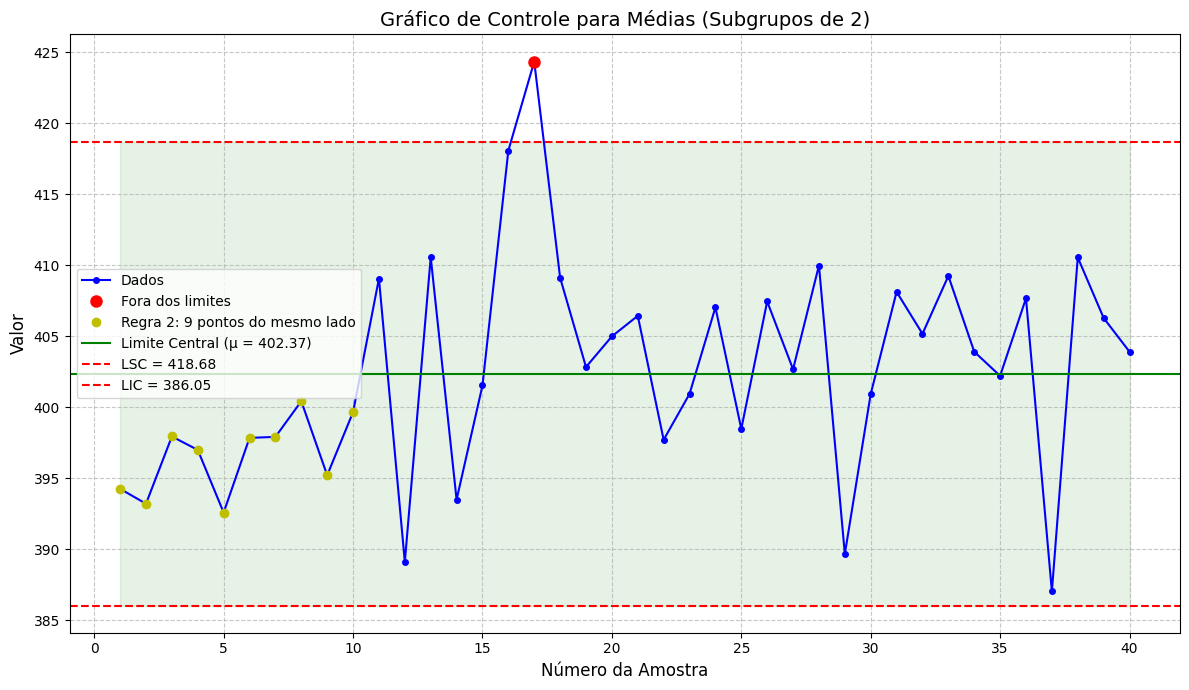

In [22]:
if __name__ == "__main__":
    main()